In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
pd.__version__ #pandas version

'0.17.1'

# Establish Connection to DB through SSH

In [4]:
from sshtunnel import SSHTunnelForwarder
import MySQLdb as db
import pandas as pd
import sys
import logging
#logging.basicConfig(stream=sys.stdout, level=logging.DEBUG) 
import paramiko
#ssh = paramiko.SSHClient()
#ssh.set_missing_host_key_policy(paramiko.AutoAddPolicy())
#ssh.connect('ssicluster2.tk.informatik.tu-darmstadt.de',port = 12822, username='arun',password='ArunDss@123',allow_agent=False,look_for_keys=False)
localhost = '127.0.0.1'
user = 'root'
password='kUrsVbpyfFWF'
database = 'Energy_AD'
def query(q):
     with SSHTunnelForwarder(
          ('ssicluster2.tk.informatik.tu-darmstadt.de', 12822),
          allow_agent=False,
          ssh_username='arun',
          ssh_password = 'ArunDss@123',
          #remote_bind_address=('130.83.163.8', 3306)
          remote_bind_address=('127.0.0.1', 3306)
           
     ) as server:
          conn = db.connect(host=localhost,
          port=server.local_bind_port,
          user=user,
          passwd=password,
          db=database)

          return pd.read_sql_query(q, conn)

# Run the desired query 

In [5]:
#!/home/arun/anaconda2/bin/python
import MySQLdb as db1
import pandas as pd
import datetime
import pandas.io.sql as psql

now = datetime.datetime.now()
print "Start date and time using str method of datetime object:"
print str(now)

chunk_size = 559141
offset = 518400
location = 'Torschlag_Trafo' + '%'
list_data = []
#Uncomment and run the below query to read all the data of particular location
#while True:
#    q = ("SELECT * FROM energy_sample_data1 where location like '%s' ORDER BY Serial_no LIMIT %s" % (location,chunk_size))
#    print(q)
#    list_data.append(query(q))
#    offset += chunk_size
#    if len(list_data[-1]) < chunk_size:
#        break
#print("Query executed")
# print("Concatenating....")
# dfs = pd.concat(list_data)

#To read only specific rows of data
q = ("SELECT * FROM energy_sample_data1 where location like '%s' ORDER BY Serial_no LIMIT %s OFFSET %s" % (location,chunk_size,offset))
print(q)
list_data.append(query(q))
dfs = pd.concat(list_data)



now1 = datetime.datetime.now()
print "End date and time using str method of datetime object:"
print str(now1)

print("Execution Completed")







Start date and time using str method of datetime object:
2016-12-23 16:11:00.011875
SELECT * FROM energy_sample_data1 where location like 'Torschlag_Trafo%' ORDER BY Serial_no LIMIT 559141 OFFSET 518400
End date and time using str method of datetime object:
2016-12-23 16:16:14.814744
Execution Completed


In [6]:
dfs.shape

(559141, 16)

In [14]:
dfs.head()

,Serial_no,Date,Time,V1,V2,V3,I1,I2,I3,I_N,Pges,Sges,CosPhi,Egy_trpt,Egy_con,Location
0,63274031,2016-02-03,00:00:00,234.99,235.40,235.33,6.26,13.95,13.28,10.37,7609.34,7889.32,0.92,24188,31220528.64,Torschlag_Trafo_03022016.csv
1,63274032,2016-02-03,00:00:01,234.81,235.14,234.95,6.23,13.60,13.28,10.37,7518.65,7774.96,0.92,24188,31220536.32,Torschlag_Trafo_03022016.csv
2,63274033,2016-02-03,00:00:02,234.81,235.14,234.95,6.23,13.60,13.28,10.37,7518.65,7774.96,0.92,24188,31220536.32,Torschlag_Trafo_03022016.csv
3,63274034,2016-02-03,00:00:03,234.81,235.14,234.95,6.23,13.60,13.28,10.37,7518.65,7774.96,0.92,24188,31220536.32,Torschlag_Trafo_03022016.csv
4,63274035,2016-02-03,00:00:04,235.10,235.14,234.95,6.31,13.60,13.28,10.96,7518.65,7774.96,0.92,24188,31220536.32,Torschlag_Trafo_03022016.csv


In [15]:
dfs.tail()

,Serial_no,Date,Time,V1,V2,V3,I1,I2,I3,I_N,Pges,Sges,CosPhi,Egy_trpt,Egy_con,Location
559136,64081311,2015-12-05,23:59:55,237.27,236.93,236.55,7.59,25.50,22.24,21.44,12762.00,13084.04,0.9,624,2434463.04,Torschlag_Trafo_05122015.csv
559137,64081312,2015-12-05,23:59:56,237.27,236.93,236.55,7.59,25.50,22.24,21.44,12762.00,13084.04,0.9,624,2434463.04,Torschlag_Trafo_05122015.csv
559138,64081313,2015-12-05,23:59:57,237.27,236.93,236.55,7.59,25.50,22.24,21.44,12762.00,13084.04,0.9,624,2434463.04,Torschlag_Trafo_05122015.csv
559139,64081314,2015-12-05,23:59:58,237.14,236.88,236.54,7.60,24.55,22.28,21.08,12545.11,12880.30,0.9,624,2434463.04,Torschlag_Trafo_05122015.csv
559140,64081315,2015-12-05,23:59:59,237.14,236.88,236.54,7.60,24.55,22.28,21.08,12545.11,12880.30,0.9,624,2434476.00,Torschlag_Trafo_05122015.csv


# Run the below code when data is read from SQL

In [16]:
cols = 'DESC energy_sample_data1 '
columns_list = query(cols)

In [17]:
cols_sql = pd.DataFrame(columns_list)
print("Columns names:")
print(cols_sql.iloc[:,0])

Columns names:
0     Serial_no
1          Date
2          Time
3            V1
4            V2
5            V3
6            I1
7            I2
8            I3
9           I_N
10         Pges
11         Sges
12       CosPhi
13     Egy_trpt
14      Egy_con
15     Location
Name: Field, dtype: object


In [18]:
#df_cols = cols_sql.iloc[:,0] # use this to read columns from sql
#columns_names= df_cols.tolist()

print("Columns names:")
print(dfs.columns.tolist())

Columns names:
['Serial_no', 'Date', 'Time', 'V1', 'V2', 'V3', 'I1', 'I2', 'I3', 'I_N', 'Pges', 'Sges', 'CosPhi', 'Egy_trpt', 'Egy_con', 'Location']


In [19]:
import gc
gc.collect()
#dfs.iloc[0:2500000][1:].corr()
#dfs.ix[0:2500000,'Serial_no':].corr()

411

In [20]:
dfs.corr()

,Serial_no,V1,V2,V3,I1,I2,I3,I_N,Pges,Sges,CosPhi,Egy_trpt,Egy_con
Serial_no,1.000000,0.339278,0.305497,0.306613,-0.091274,-0.170556,-0.149646,-0.207518,-0.144885,-0.142333,-0.026455,-0.337630,-0.446024
V1,0.339278,1.000000,0.980916,0.990526,-0.341511,-0.367084,-0.335955,-0.259665,-0.348127,-0.346753,-0.150255,-0.459382,-0.442746
V2,0.305497,0.980916,1.000000,0.989083,-0.439893,-0.482536,-0.442249,-0.365602,-0.457162,-0.456042,-0.178520,-0.456906,-0.403113
V3,0.306613,0.990526,0.989083,1.000000,-0.386336,-0.413772,-0.385552,-0.311086,-0.395737,-0.394600,-0.168810,-0.455888,-0.415391
I1,-0.091274,-0.341511,-0.439893,-0.386336,1.000000,0.946106,0.961508,0.643003,0.978422,0.979088,0.457402,0.136815,0.076398
I2,-0.170556,-0.367084,-0.482536,-0.413772,0.946106,1.000000,0.971220,0.820731,0.987537,0.987890,0.334459,0.148367,0.118632
I3,-0.149646,-0.335955,-0.442249,-0.385552,0.961508,0.971220,1.000000,0.745147,0.991183,0.991403,0.363241,0.120883,0.083889
I_N,-0.207518,-0.259665,-0.365602,-0.311086,0.643003,0.820731,0.745147,1.000000,0.754100,0.755206,0.027024,0.020117,0.054806
Pges,-0.144885,-0.348127,-0.457162,-0.395737,0.978422,0.987537,0.991183,0.754100,1.000000,0.999535,0.399048,0.139698,0.097598
Sges,-0.142333,-0.346753,-0.456042,-0.394600,0.979088,0.987890,0.991403,0.755206,0.999535,1.000000,0.383863,0.134359,0.093723


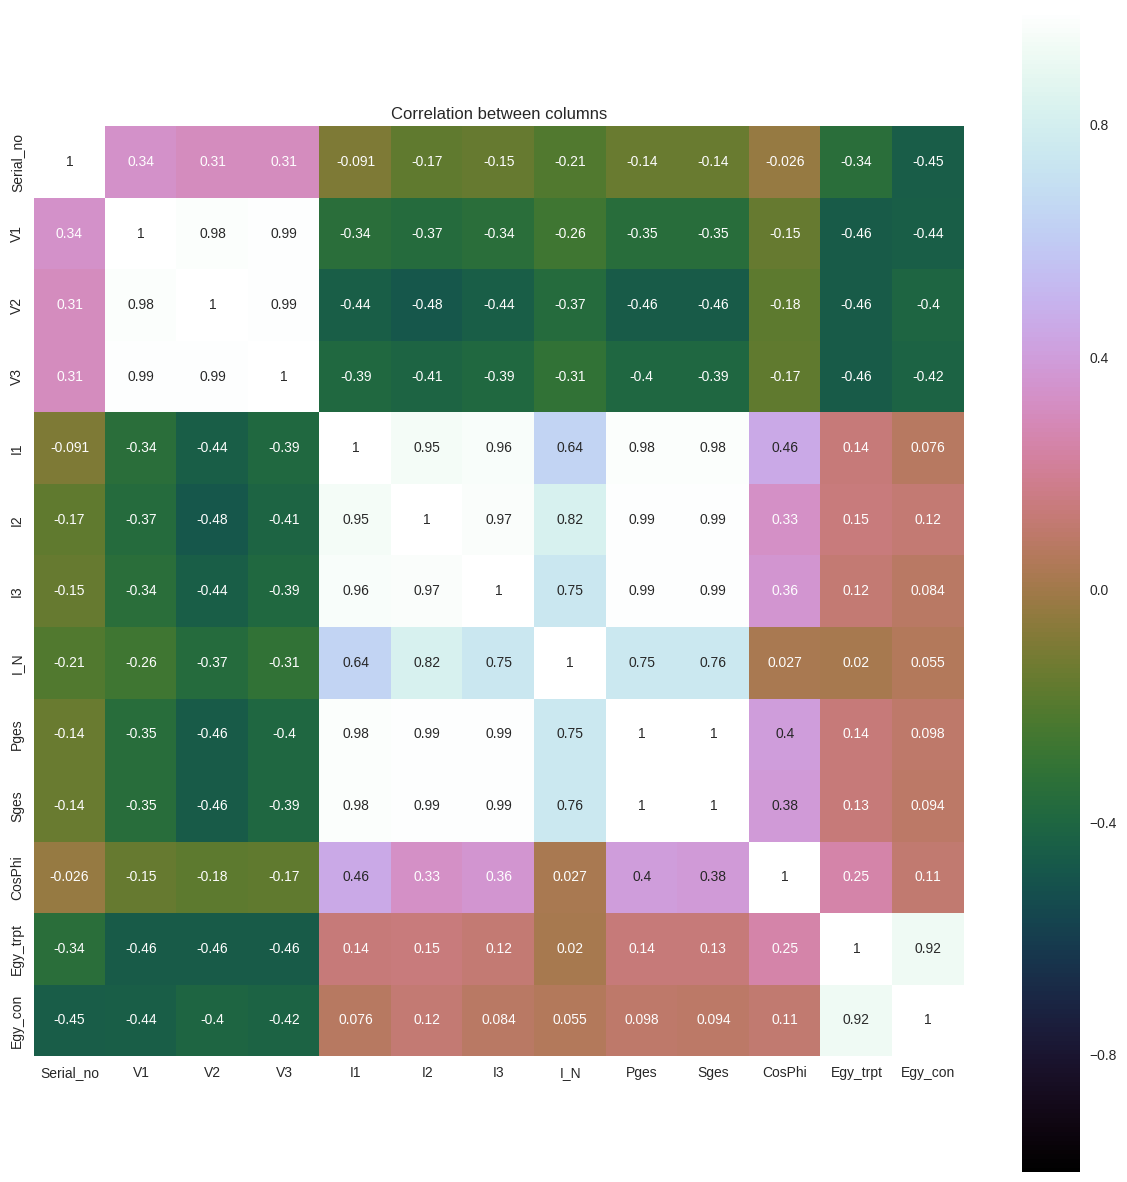

In [22]:
correlation = dfs.corr()
#plt.figure(figsize=(13,13))
fig = plt.figure(figsize=(15,15)) 
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation between columns')

fig.savefig('Correlation_part1 Torschlag_Trafo_518401_1077541.png')

# Statistics calculation implementation

# Plot statistics by grouping location 

In [23]:
dfs_loc = dfs.groupby('Location') # groupby location wise
#df_loc_part1 = dfs_drop_part1.groupby('Location') # groupby location wise

# Describe() : Produces the basic statistics of the DataFrame

In [24]:
dfs.drop(labels=['Time','Serial_no'],axis=1).describe()

,V1,V2,V3,I1,I2,I3,I_N,Pges,Sges,CosPhi,Egy_trpt,Egy_con
count,559141.000000,559141.000000,559141.000000,559141.000000,559141.000000,559141.000000,559141.000000,559141.000000,559141.000000,559141.000000,559141.000000,559141.000000
mean,234.270648,233.856926,233.722410,29.048011,47.156279,42.007270,20.954343,26269.282792,27576.519887,0.915683,11832.354726,12769564.338499
std,1.770927,1.899460,1.822251,27.570577,37.049468,32.742619,11.644585,21336.901299,22318.263128,0.038678,11005.481879,11834838.136136
min,228.140000,227.840000,227.820000,2.590000,3.660000,9.000000,4.390000,833.360000,4064.270000,0.520000,0.000000,791424.000000
25%,233.090000,232.560000,232.510000,8.150000,17.230000,15.400000,11.950000,9224.800000,9713.790000,0.900000,0.000000,1972344.000000
50%,234.260000,233.870000,233.750000,14.050000,27.780000,25.400000,17.370000,15271.280000,15977.140000,0.920000,20356.000000,14753724.160000
75%,235.540000,235.250000,235.030000,46.410000,78.360000,67.880000,28.070000,43368.980000,45226.300000,0.940000,20356.000000,16119824.640000
max,239.220000,238.470000,238.620000,165.130000,191.770000,184.160000,105.360000,116948.000000,122588.310000,1.020000,24189.000000,32183191.040000


# Saving the basic statistics to csv

In [25]:
dfs.drop(labels=['Time','Serial_no'],axis=1).describe().to_csv(r'Torschlag_Trafo_518401_1077541_describe.csv',sep=',')

In [26]:
#dfs.iloc[0:500000][:].describe().to_csv(r'Torschlag_Trafo_corr_desc_1.csv',sep=',')

In [27]:
#dfs.iloc[500000:1000000][:].describe().to_csv(r'Torschlag_Trafo_corr_desc_2.csv',sep=',')

In [28]:
#dfs.iloc[1000000:1500000][:].describe().to_csv(r'Torschlag_Trafo_corr_desc_3.csv',sep=',')

In [29]:
#dfs.iloc[1500000:2000000][:].describe().to_csv(r'Torschlag_Trafo_corr_desc_4.csv',sep=',')

In [30]:
#dfs.iloc[2000000:2500000][:].describe().to_csv(r'Torschlag_Trafo_corr_desc_5.csv',sep=',')

In [31]:
#dfs.iloc[2500000:3000000][:].describe().to_csv(r'Torschlag_Trafo_corr_desc_6.csv',sep=',')

In [32]:
#dfs.iloc[3000000:3500000][:].describe().to_csv(r'Torschlag_Trafo_corr_desc_7.csv',sep=',')

In [33]:
#dfs.iloc[3500000:4000000][:].describe().to_csv(r'Torschlag_Trafo_corr_desc_8.csv',sep=',')

In [34]:
#dfs.iloc[4000000:4500000][:].describe().to_csv(r'Torschlag_Trafo_corr_desc_9.csv',sep=',')

In [35]:
#dfs.iloc[4500000:-1][:].describe().to_csv(r'Torschlag_Trafo_corr_last.csv',sep=',')

# Below you will calculate the correlation on the data grouped by location

In [36]:
#dfs_grp_loc = dfs.iloc[0:500000][:]

In [37]:
#dfs_grp_loc.groupby('Location').describe()

In [41]:
#dfs.iloc[500000:1000000][:].groupby('Location').describe()
dfs['Location'].unique()

array(['Torschlag_Trafo_03022016.csv', 'Torschlag_Trafo_03122015.csv',
       'Torschlag_Trafo_04012016.csv', 'Torschlag_Trafo_04022016.csv',
       'Torschlag_Trafo_04122015.csv', 'Torschlag_Trafo_05012016.csv',
       'Torschlag_Trafo_05122015.csv'], dtype=object)

In [26]:
dfs_loc.corr(method='pearson', min_periods=1)

CosPhi   Egy_con  Egy_trpt  \
Location                                                               
Torschlag_Trafo_03022016.csv CosPhi     1.000000 -0.227896 -0.203414   
                             Egy_con   -0.227896  1.000000  0.917333   
                             Egy_trpt  -0.203414  0.917333  1.000000   
                             I1         0.563618  0.059490  0.049172   
                             I2         0.372816  0.093243  0.098897   
                             I3         0.503420  0.111754  0.123919   
                             I_N        0.061827  0.181088  0.209991   
                             Pges       0.495050  0.084458  0.087675   
                             Serial_no -0.187377  0.980379  0.865775   
                             Sges       0.477635  0.091073  0.092803   
                             V1         0.113826  0.069114 -0.062164   
                             V2         0.131721 -0.000365 -0.111285   
                             V3         0.091139  0.023490 -0.100959   
Torschlag_Trafo_03122015.csv CosPhi     1.000000 -0.218983       NaN   
                             Egy_con   -0.218983  1.000000       NaN   
                             Egy_trpt        NaN       NaN       NaN   
                             I1         0.651116  0.000899       NaN   
                             I2         0.524675  0.103540       NaN   
                             I3         0.546971  0.129780       NaN   
                             I_N        0.232306  0.128303       NaN   
                             Pges       0.584156  0.091764       NaN   
                             Serial_no -0.197460  0.976916       NaN   
                             Sges       0.574965  0.087662       NaN   
                             V1        -0.292666  0.291312       NaN   
                             V2        -0.324872  0.218314       NaN   
                             V3        -0.297607  0.299627       NaN   
Torschlag_Trafo_04012016.csv CosPhi     1.000000 -0.201181       NaN   
                             Egy_con   -0.201181  1.000000       NaN   
                             Egy_trpt        NaN       NaN       NaN   
                             I1         0.285425  0.006687       NaN   
...                                          ...       ...       ...   
Torschlag_Trafo_04122015.csv Sges       0.537971  0.028764       NaN   
                             V1        -0.036503  0.017670       NaN   
                             V2        -0.079686 -0.054351       NaN   
                             V3        -0.049762  0.005358       NaN   
Torschlag_Trafo_05012016.csv CosPhi     1.000000 -0.087526       NaN   
                             Egy_con   -0.087526  1.000000       NaN   
                             Egy_trpt        NaN       NaN       NaN   
                             I1         0.297713  0.041490       NaN   
                             I2         0.165244  0.122343       NaN   
                             I3         0.208405  0.092695       NaN   
                             I_N       -0.011895  0.110707       NaN   
                             Pges       0.227525  0.097578       NaN   
                             Serial_no -0.088485  0.975483       NaN   
                             Sges       0.218923  0.092580       NaN   
                             V1        -0.120885  0.259001       NaN   
                             V2        -0.097044  0.201665       NaN   
                             V3        -0.123927  0.252561       NaN   
Torschlag_Trafo_05122015.csv CosPhi     1.000000 -0.237283 -0.224096   
                             Egy_con   -0.237283  1.000000  0.866557   
                             Egy_trpt  -0.224096  0.866557  1.000000   
                             I1         0.406674 -0.104692 -0.323499   
                             I2         0.224536  0.029083 -0.347313   
                             I3         0.189946  0.007194 -0.334411   
          

# Compute only the mean of the data grouped by location and visualize

In [45]:
df_st_mean = dfs_loc.mean()
df_st_mean

,Serial_no,V1,V2,V3,I1,I2,I3,I_N,Pges,Sges,CosPhi,Egy_trpt,Egy_con
Location,,,,,,,,,,,,,
Torschlag_Trafo_03022016.csv,63317230,233.125733,232.871237,232.700838,28.492373,53.578282,45.340864,25.087006,28333.368502,29659.961005,0.905568,24188.487975,31544372.604267
Torschlag_Trafo_03122015.csv,63448300,234.388176,233.946034,233.814477,31.634187,53.742738,48.529846,25.130690,29704.012230,31255.990112,0.908852,0.000000,1128566.616801
Torschlag_Trafo_04012016.csv,63579370,234.057103,233.412494,233.467930,33.755647,49.549451,44.993479,18.227577,28721.644452,29900.351556,0.939565,20356.000000,15033409.010000
Torschlag_Trafo_04022016.csv,63687611,233.296071,233.166340,232.943450,27.807072,45.782541,38.901159,18.238441,24979.829337,26232.890523,0.918265,24189.000000,31982240.349589
Torschlag_Trafo_04122015.csv,63775975,234.853861,234.516268,234.342832,28.549882,46.890383,42.297913,22.343086,26157.346087,27587.487381,0.908209,0.000000,1813138.102052
Torschlag_Trafo_05012016.csv,63907045,233.533526,232.810581,232.709002,39.145072,57.523212,50.979539,21.207376,32733.111938,34247.270473,0.936766,20356.000000,15753799.081066
Torschlag_Trafo_05122015.csv,64038115,236.125039,235.910581,235.666692,13.296056,22.301377,21.366635,15.010978,12574.241591,13441.632912,0.893922,266.995880,2284567.823199


In [46]:
df_st_mean.to_csv(r'Torschlag_trafo_mean_groupby_location_518401_1077541.csv',sep=',')

# Plot the groupby location 

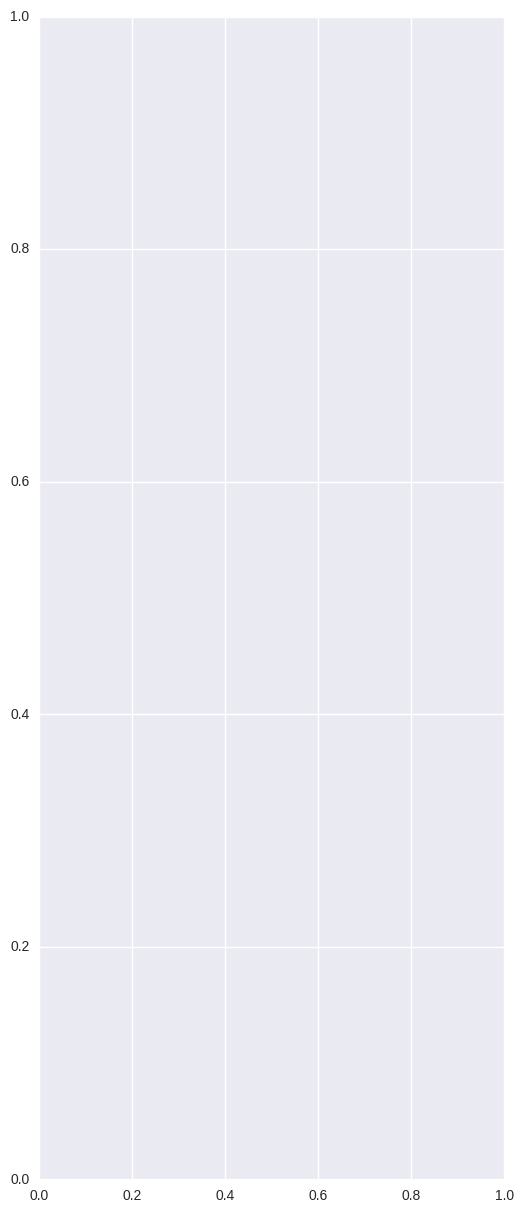

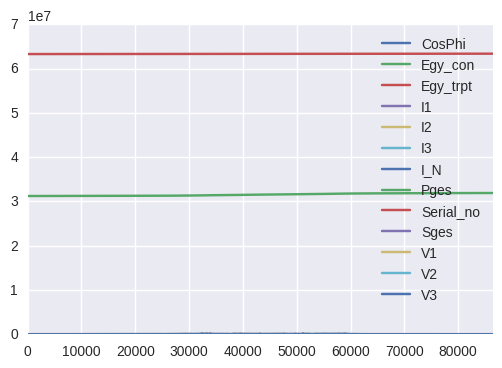

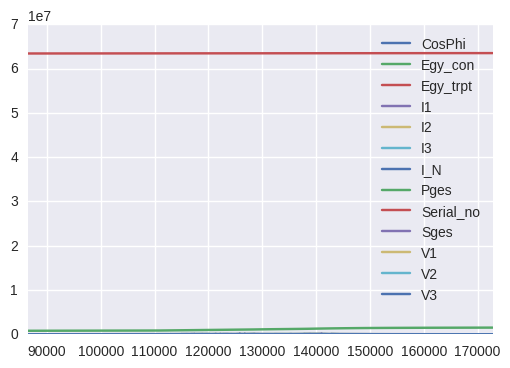

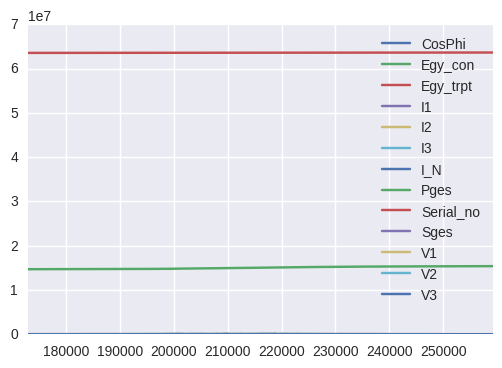

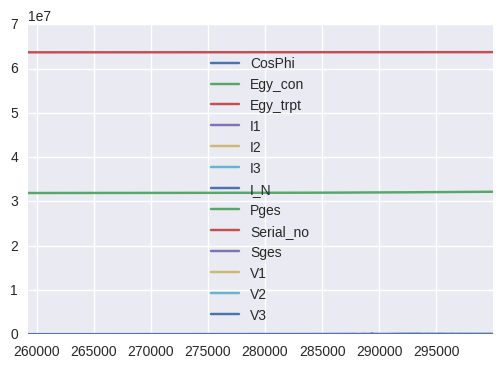

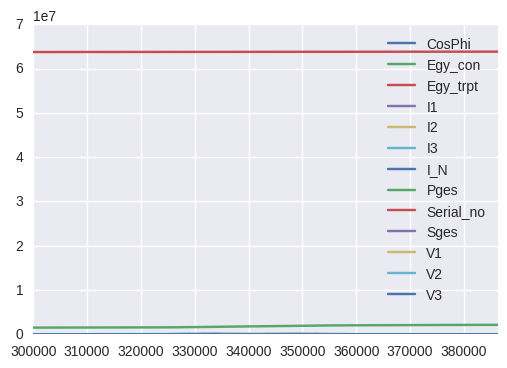

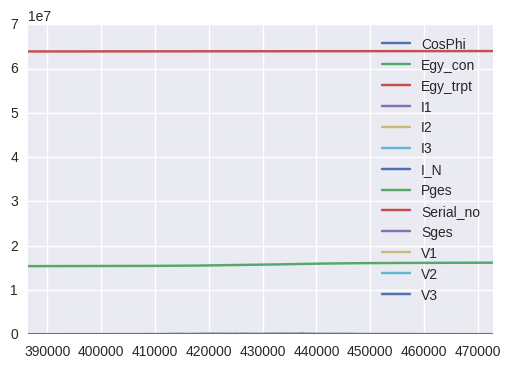

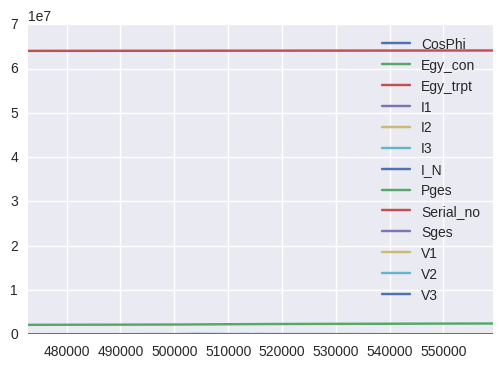

In [47]:
fig1,ax2 = plt.subplots(figsize=(6,15))
bp = dfs_loc.plot(kind='kde', ax2 = ax2, legend=False)


# PCA implementation

In [48]:
dfs_drop = dfs.drop(labels=['Serial_no', 'Date', 'Time','Location'],axis=1)

In [49]:
dfs_drop.columns

Index([u'V1', u'V2', u'V3', u'I1', u'I2', u'I3', u'I_N', u'Pges', u'Sges',
       u'CosPhi', u'Egy_trpt', u'Egy_con'],
      dtype='object')

In [50]:
X = dfs_drop.iloc[:,0:6].values
X

array([[ 234.99,  235.4 ,  235.33,    6.26,   13.95,   13.28],
       [ 234.81,  235.14,  234.95,    6.23,   13.6 ,   13.28],
       [ 234.81,  235.14,  234.95,    6.23,   13.6 ,   13.28],
       ..., 
       [ 237.27,  236.93,  236.55,    7.59,   25.5 ,   22.24],
       [ 237.14,  236.88,  236.54,    7.6 ,   24.55,   22.28],
       [ 237.14,  236.88,  236.54,    7.6 ,   24.55,   22.28]])

In [51]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [52]:
from sklearn.decomposition import PCA 
sklearn_pca = PCA(n_components=6)
Y_sklearn = sklearn_pca.fit_transform(X_std)

In [53]:
Y_sklearn.shape

(559141, 6)

In [54]:
n_components = pd.DataFrame(Y_sklearn, columns=('V1', 'V2', 'V3', 'I1', 'I2', 'I3'))
n_components.head()

,V1,V2,V3,I1,I2,I3
0,-1.922852,-0.235591,0.068878,-0.006723,0.275285,-0.161334
1,-1.742287,-0.419287,0.076001,0.008474,0.223618,-0.103496
2,-1.742287,-0.419287,0.076001,0.008474,0.223618,-0.103496
3,-1.742287,-0.419287,0.076001,0.008474,0.223618,-0.103496
4,-1.806167,-0.346095,0.059617,-0.002365,0.098683,-0.066183


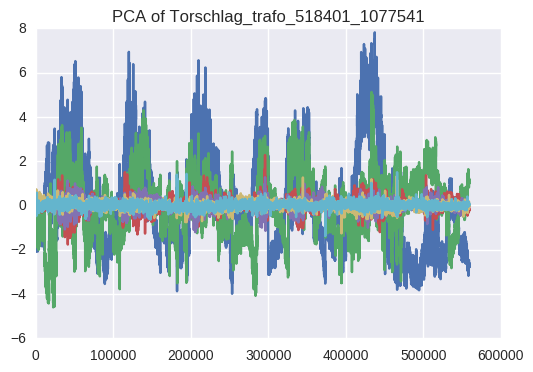

In [55]:
fig = plt.figure() 
plt.legend(loc='upper right')
plt.plot(n_components)
plt.title("PCA of Torschlag_trafo_518401_1077541")

fig.savefig('PCA of Torschlag_trafo_518400_1077541.png')


# Plot voltage vs time

In [7]:
dfs['Location'].unique()

array(['Torschlag_Trafo_03022016.csv', 'Torschlag_Trafo_03122015.csv',
       'Torschlag_Trafo_04012016.csv', 'Torschlag_Trafo_04022016.csv',
       'Torschlag_Trafo_04122015.csv', 'Torschlag_Trafo_05012016.csv',
       'Torschlag_Trafo_05122015.csv'], dtype=object)

In [8]:
def plotfunc(ax, a, b):
    return ax.plot(a, b)

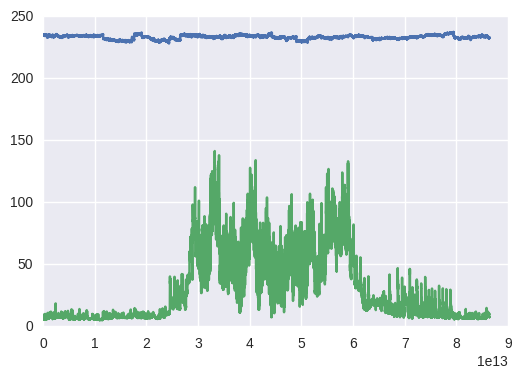

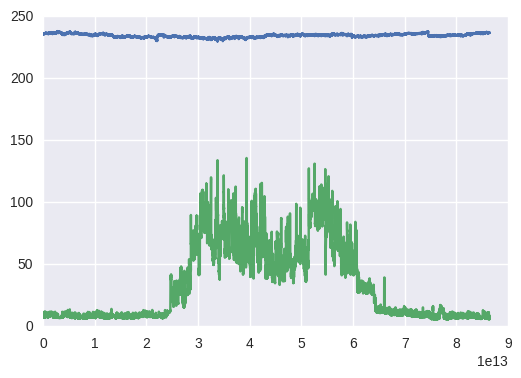

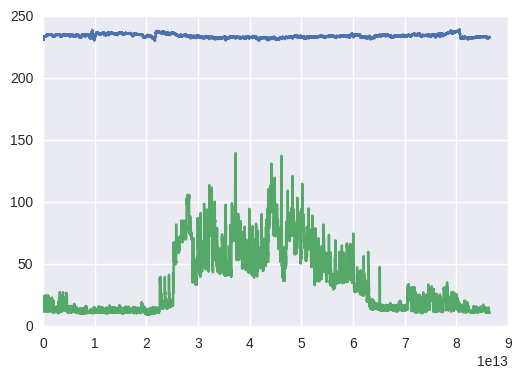

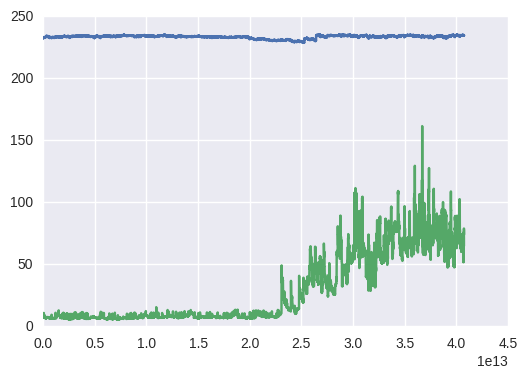

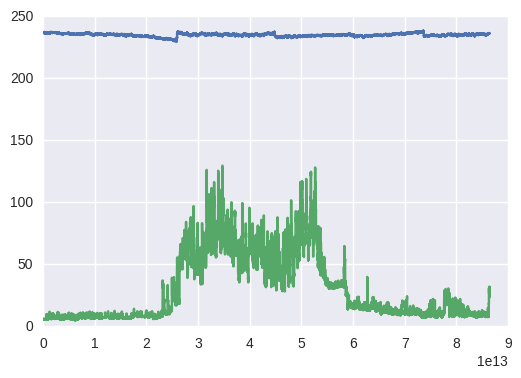

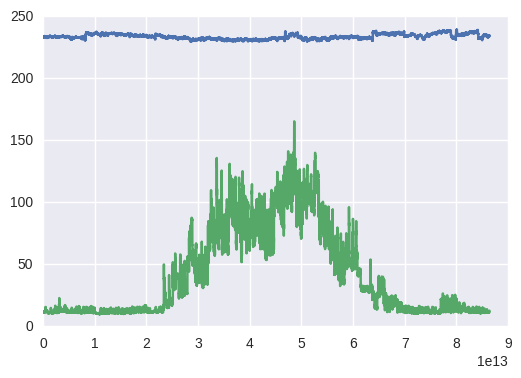

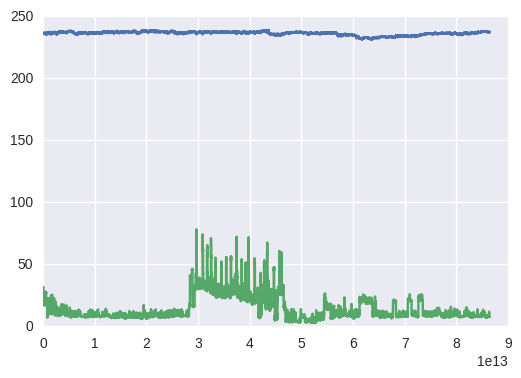

In [9]:
for loc in iter(dfs['Location'].unique()):
    fig, ax = plt.subplots(1,1)
    b = dfs['V1'].where (dfs['Location'] == loc)
    b1 = dfs['I1'].where (dfs['Location'] == loc)
    a = dfs['Time'].where (dfs['Location'] == loc)
    l1 = plotfunc(ax, a, b)
    l2 = plotfunc(ax, a, b1)
    plt.savefig('V1_I1_Time of %s.png' % loc)
    plt.show()